In [1]:
# 캐글코리아 타이타닉 주소
# https://kaggle-kr.tistory.com/17?category=868316

#라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #시각화
import seaborn as sns #시각화

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno #NULL 데이터를 쉽게 보여주는 라이브러리
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
#출처: https://korbillgates.tistory.com/85 [생물정보학자의 블로그:티스토리]

/tmp/ipykernel_19/845214248.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
#Kaggle에서 데이터들은 input 폴더안에 있다...
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head()
#우리가 다루는 문제에서 feature는
#Pclass, Age, SibSp, Parch, Fare 이며,
#예측하려는 target label 은 Survived 입니다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()
#pandas dataframe 에는 describe() 메소드가 있는 데,
#이를 쓰면 각 feature 가 가진 통계치들을 반환해줍니다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
##Null data check
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
##1.1Null data check
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<Axes: >

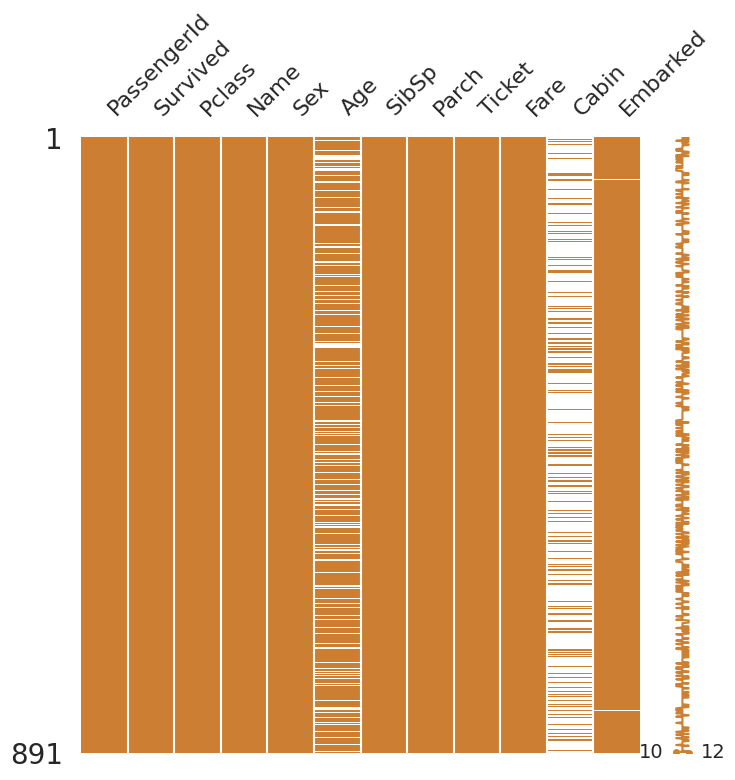

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
#여기서 빈칸이 null
#어느 위치에 null data가 존재하는지..

<Axes: >

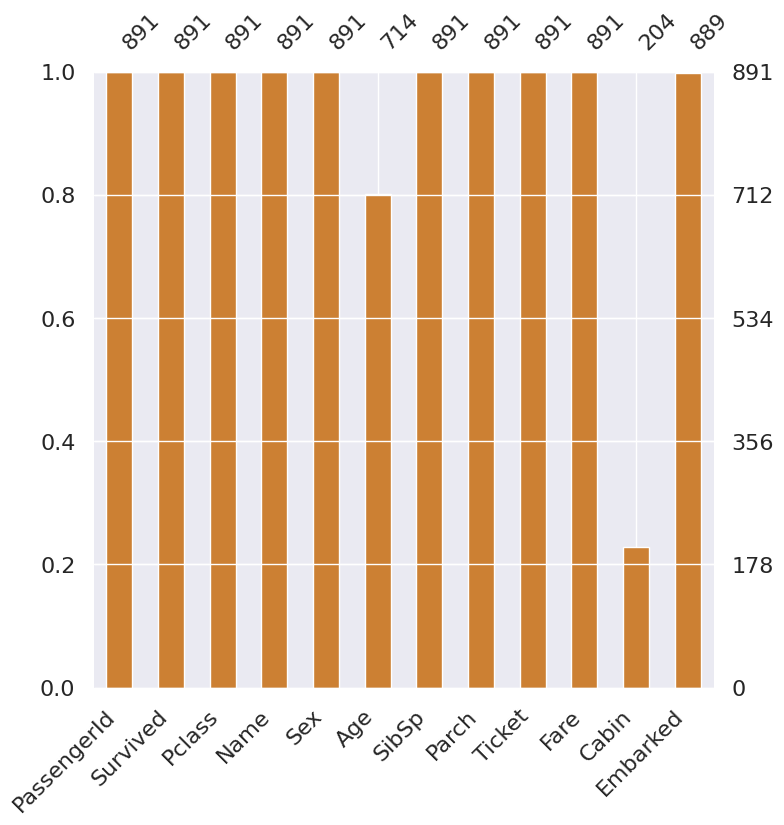

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize = (8, 8), color=(0.8, 0.5, 0.2))
#null data의 비율을 알아보는데 더 유용

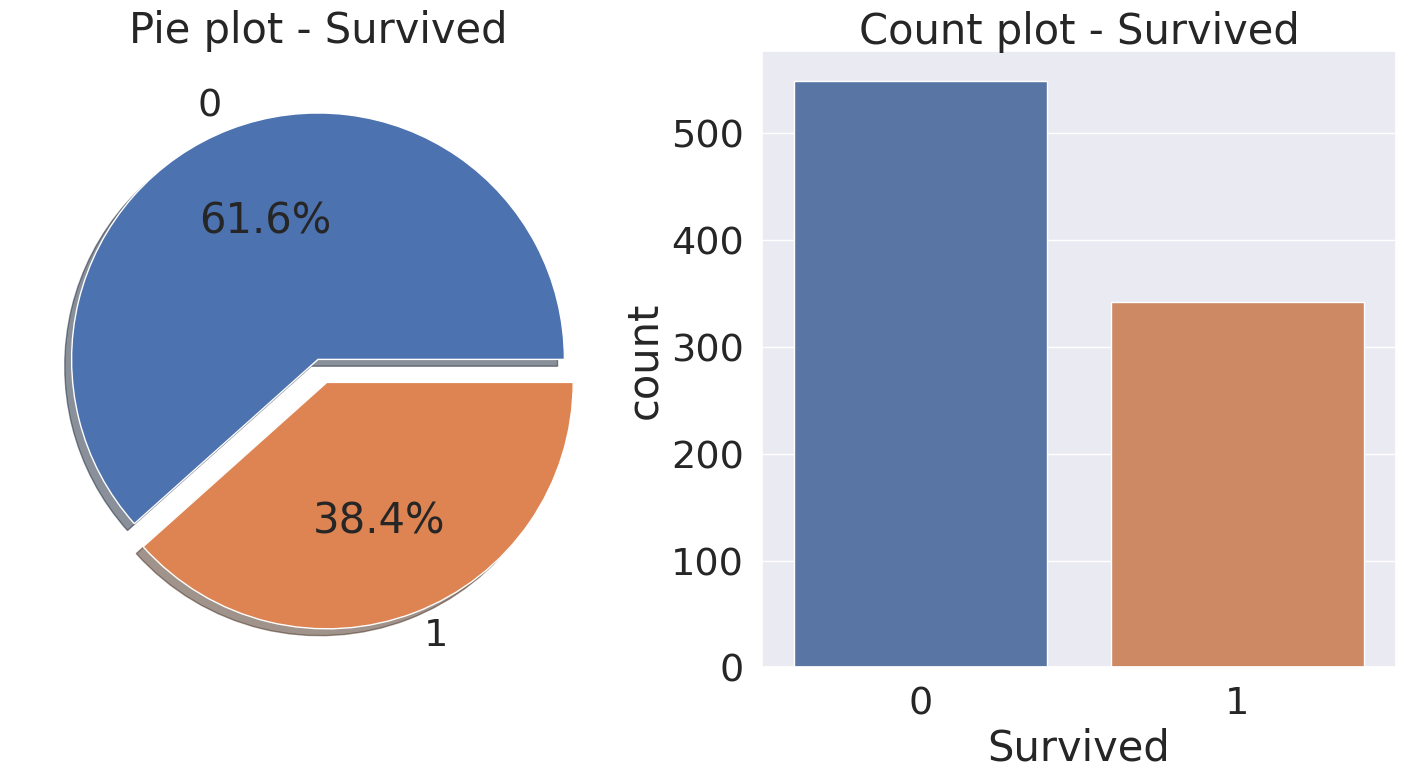

In [10]:
##1.2 Target label 확인

f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

#series형들은 plot을 가지고 있다

**2.1 Pclass**

In [11]:
#Pclass 분석
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [13]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

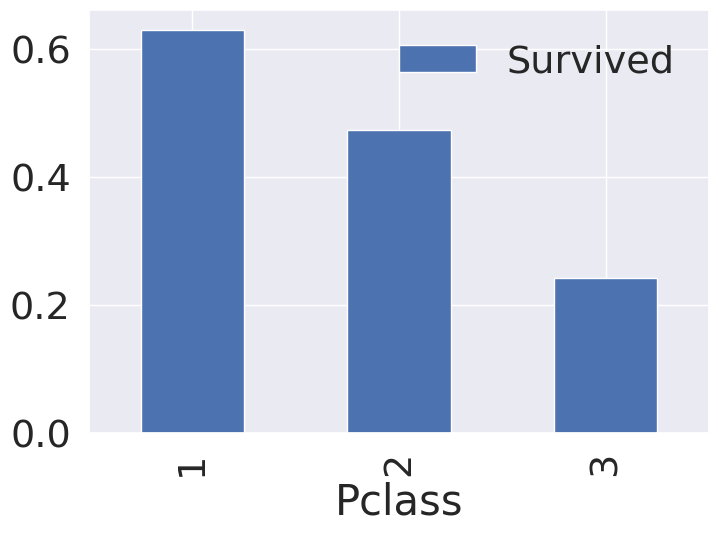

In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

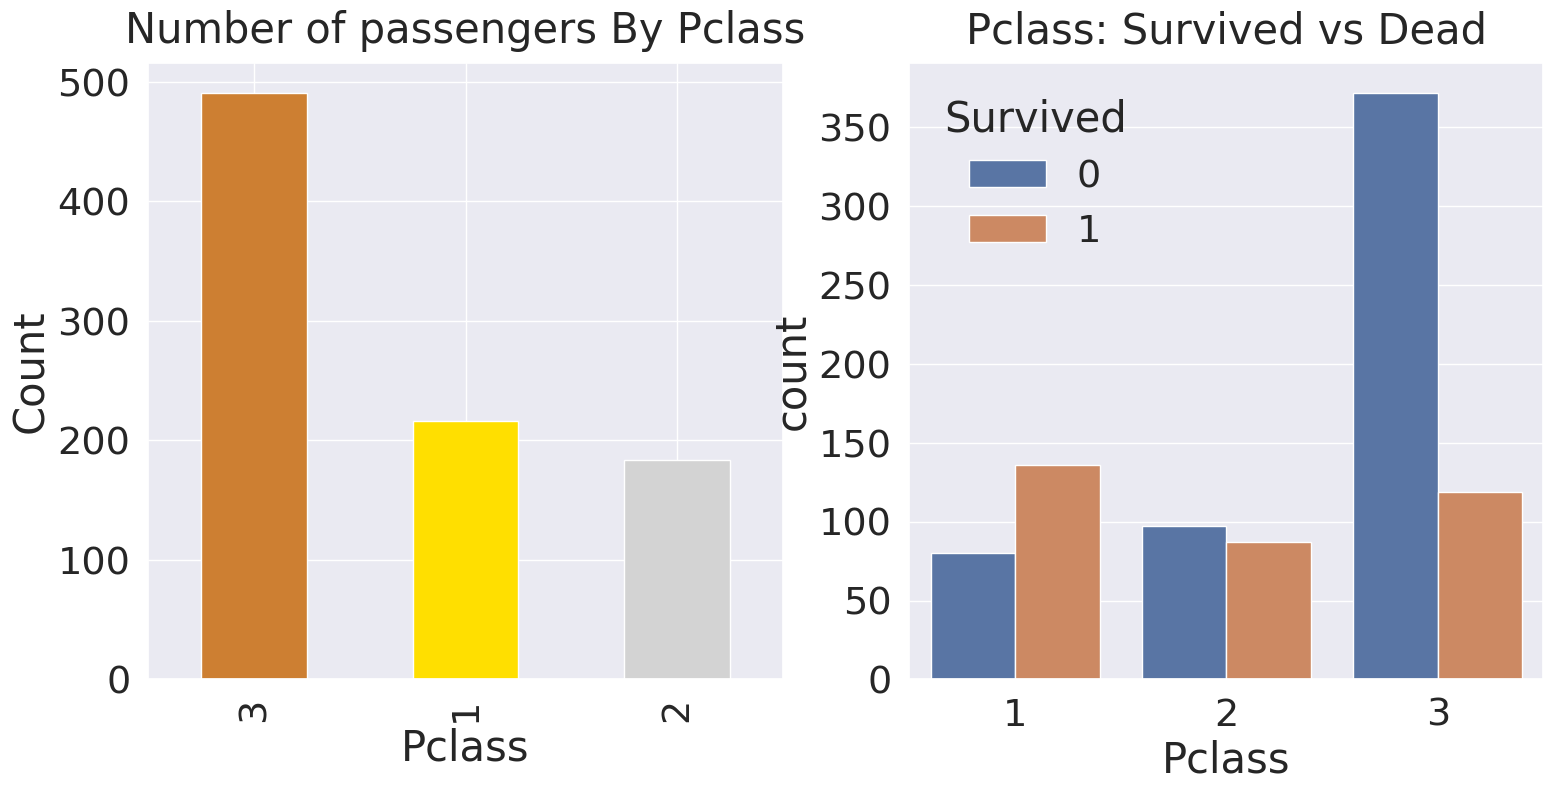

In [15]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

**2.2 Sex**

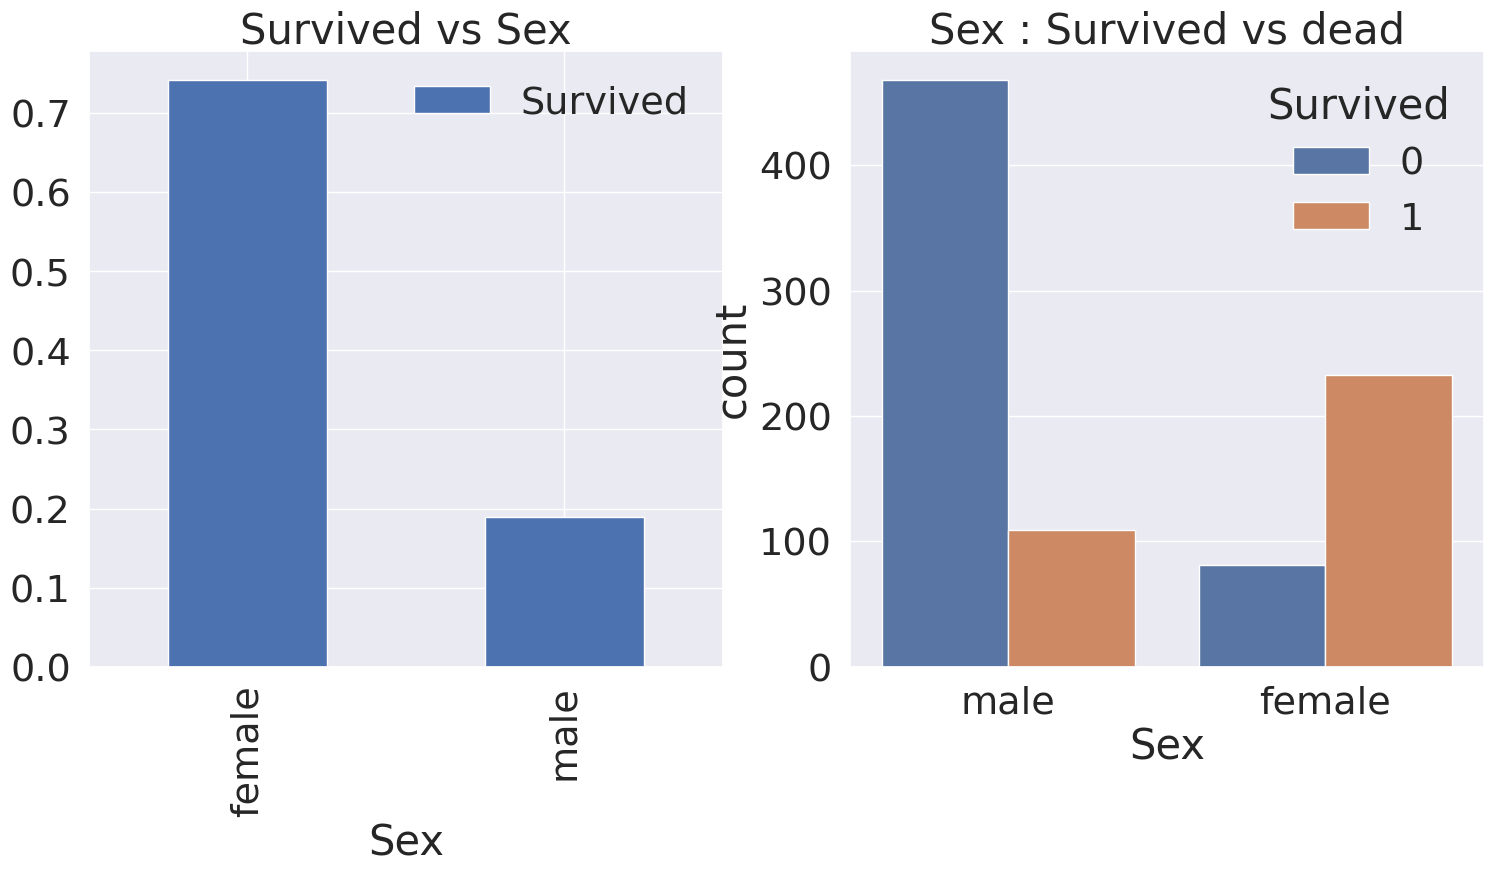

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs dead')
plt.show()

In [17]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
pd.crosstab(df_train['Sex'], df_train['Survived'], 
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


**2.3 Both Sex and Pclass**

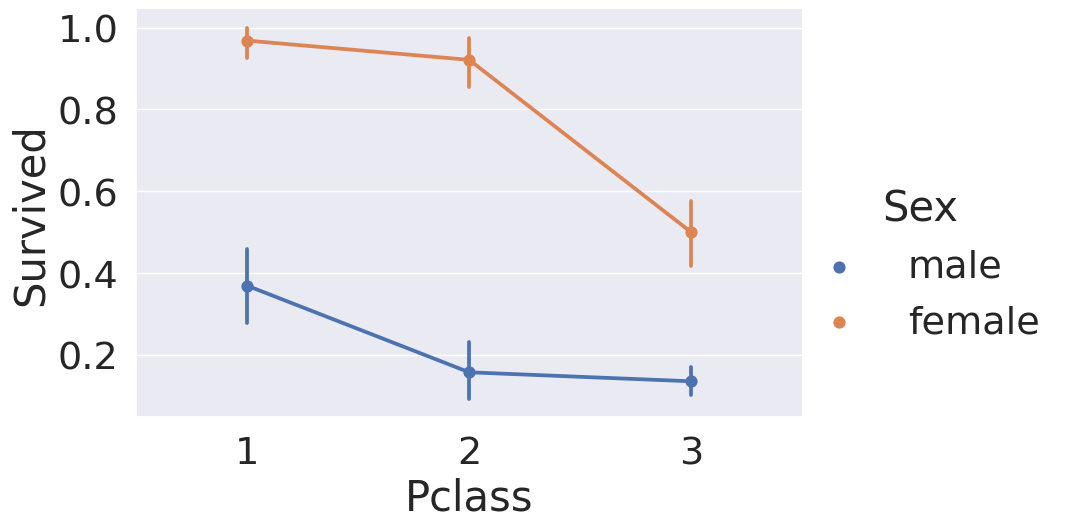

In [19]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', height=6, aspect=1.5)

##캐글 코리아에서는 factorplot을 사용했는데
##오류가 나서 구글링을 해보니 최신버전 seaborn에서는 factorplot이 사라지고 catplot을 사용
##근데 단순히 함수만 바꾸는 것이 아니라서 gpt한테 물어봄
##추가한 부분 : kind='point'

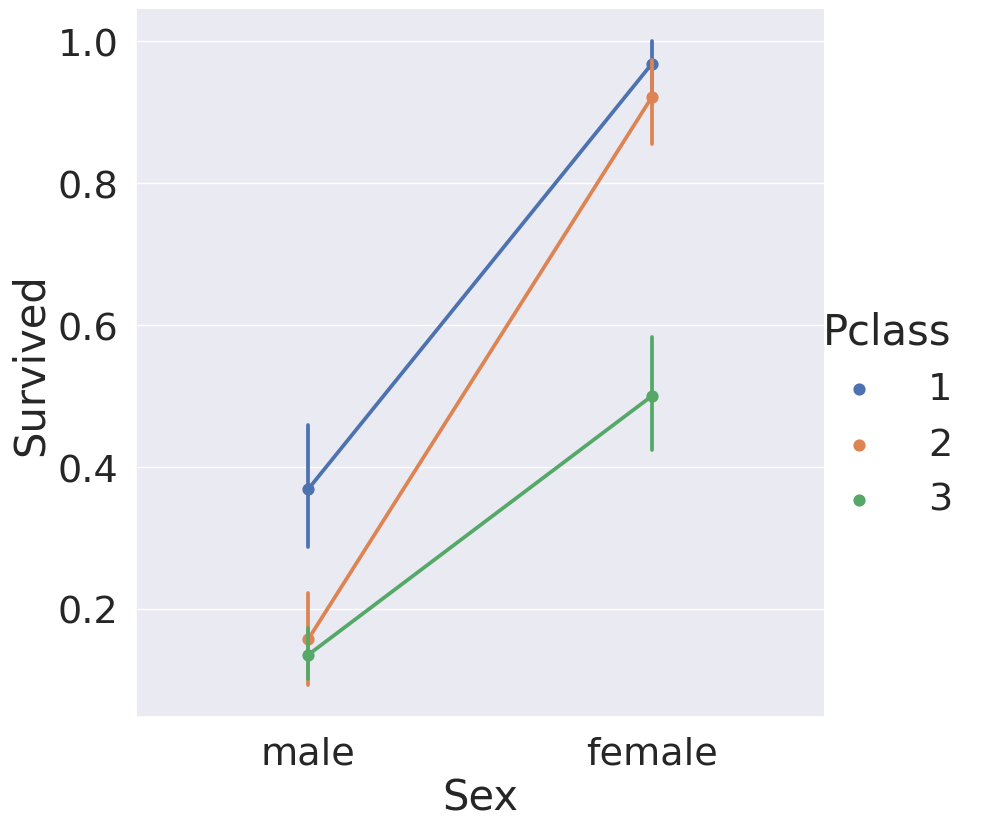

In [20]:
sns.catplot(x='Sex', y='Survived', hue='Pclass',
              data=df_train, kind='point',
               height=9, aspect=1
              )

##여기도 catplot으로 바뀌면서 많은 부분이 바뀜 (gpt한테 물어봄)

**2.4 Age**

In [21]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


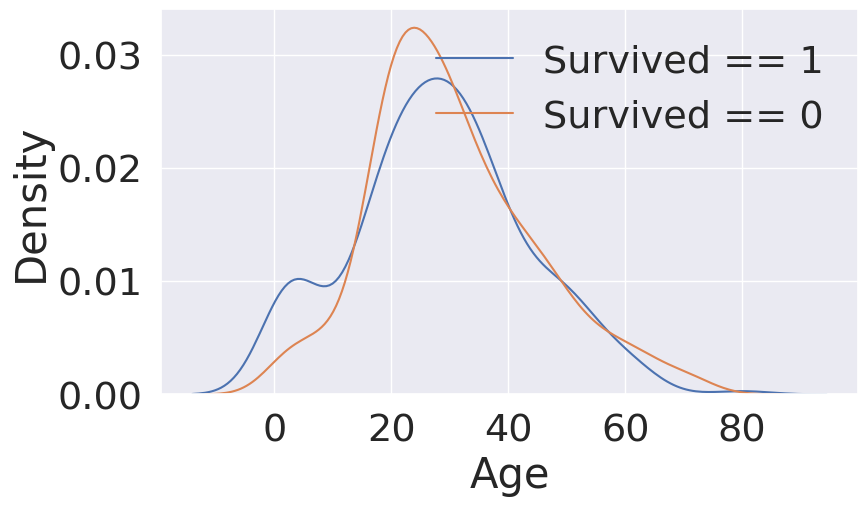

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

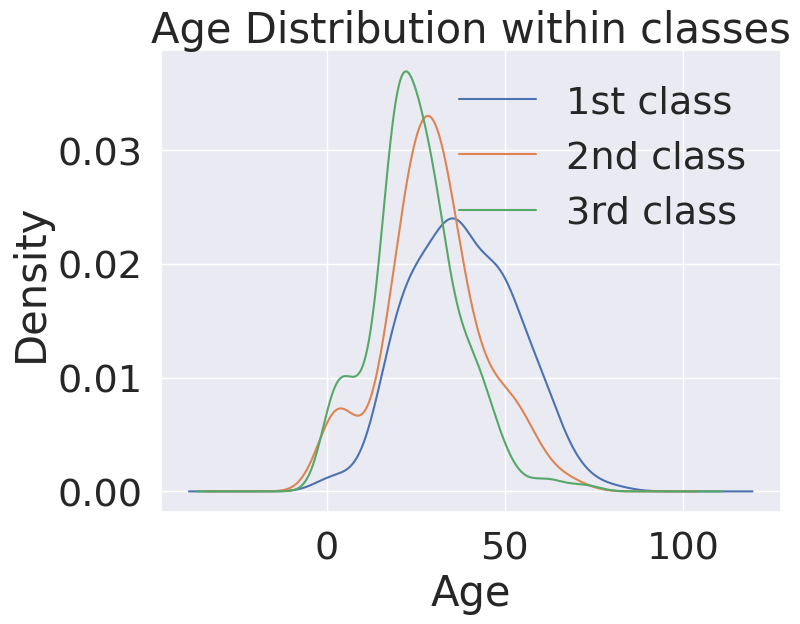

In [23]:
# Age distribution within classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title("Age Distribution within classes")
plt.legend(['1st class', '2nd class', '3rd class'])

* Class 가 높을 수록 나이 많은 사람의 비중이 커짐
* 나이대가 변하면서 생존률이 어떻게 되는 지 보려고 합니다.
* 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

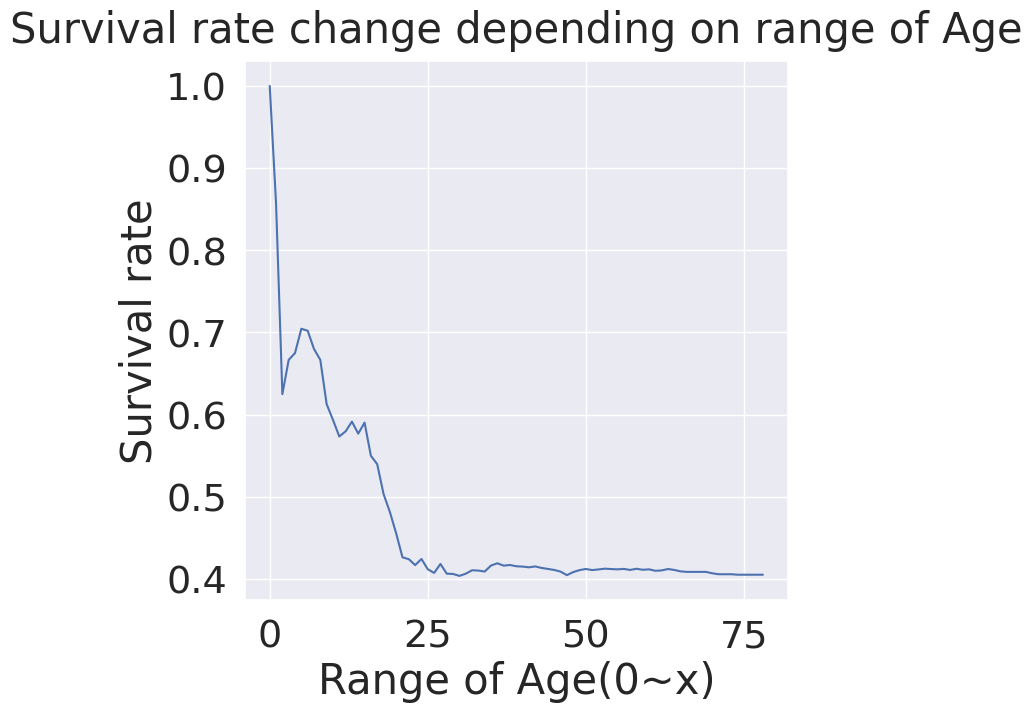

In [24]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / 
                                   len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

* 보시다시피, 나이가 어릴 수록 생존률이 확실히 높은것을 확인할 수 있습니다.
* 우리는 이 나이가 중요한 feature 로 쓰일 수 있음을 확인했습니다.

**2.5 Pclass, Sex, Age**
* 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고싶습니다. 이를 쉽게 그려주는 것이 seaborn 의 violinplot 입니다.
* x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고, y 축은 보고 싶어하는 distribution(Age) 입니다.
* 한번 그려보겠습니다

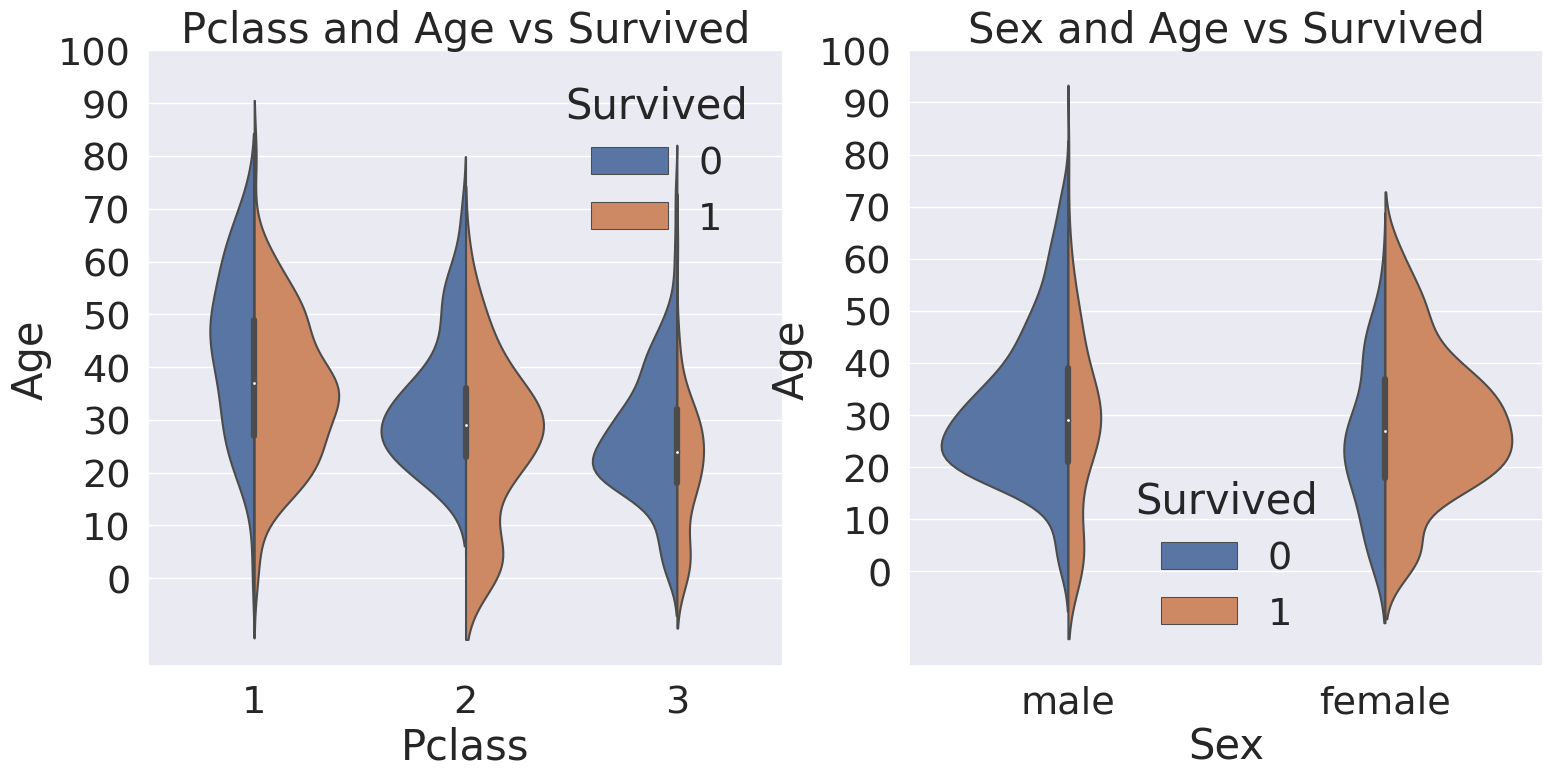

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot(x='Pclass', y='Age', hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

* 왼쪽 그림은 Pclass 별로 Age의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다.
* 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution 이 어떻게 다른지 보여주는 그래프입니다.
* 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.
* 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있습니다.
* 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

**2.6 Embarked**
* Embarked 는 탑승한 항구를 나타냅니다.
* 위에서 해왔던 것과 비슷하게 탑승한 곳에 따르 생존률을 보겠습니다.

<Axes: xlabel='Embarked'>

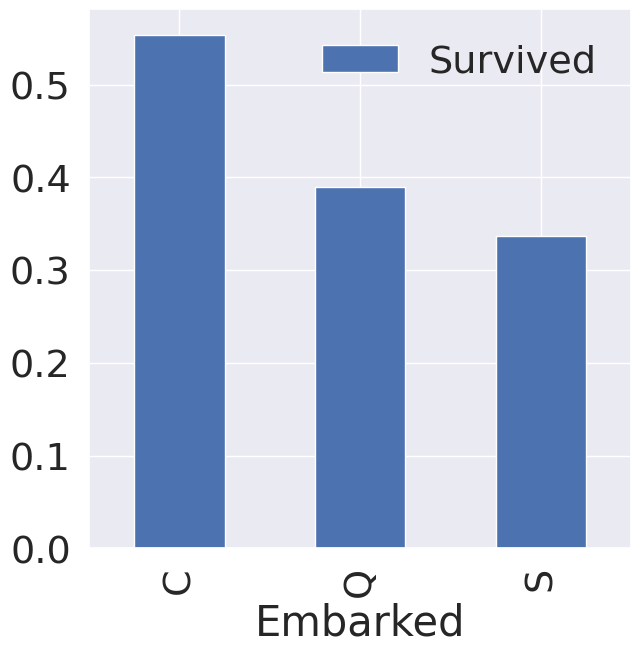

In [26]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

* 보시다시피, 조금의 차이는 있지만 생존률은 좀 비슷한 거 같습니다. 그래도 C가 제일 높군요.
* 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠습니다.
* 사실, 모델을 만들고 나면 우리가 사용한 feature 들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다. 이는 추후에 모델을 만들고 난 다음에 살펴볼 것입니다.
* 다른 feature 로 split 하여 한번 살펴보겠습니다

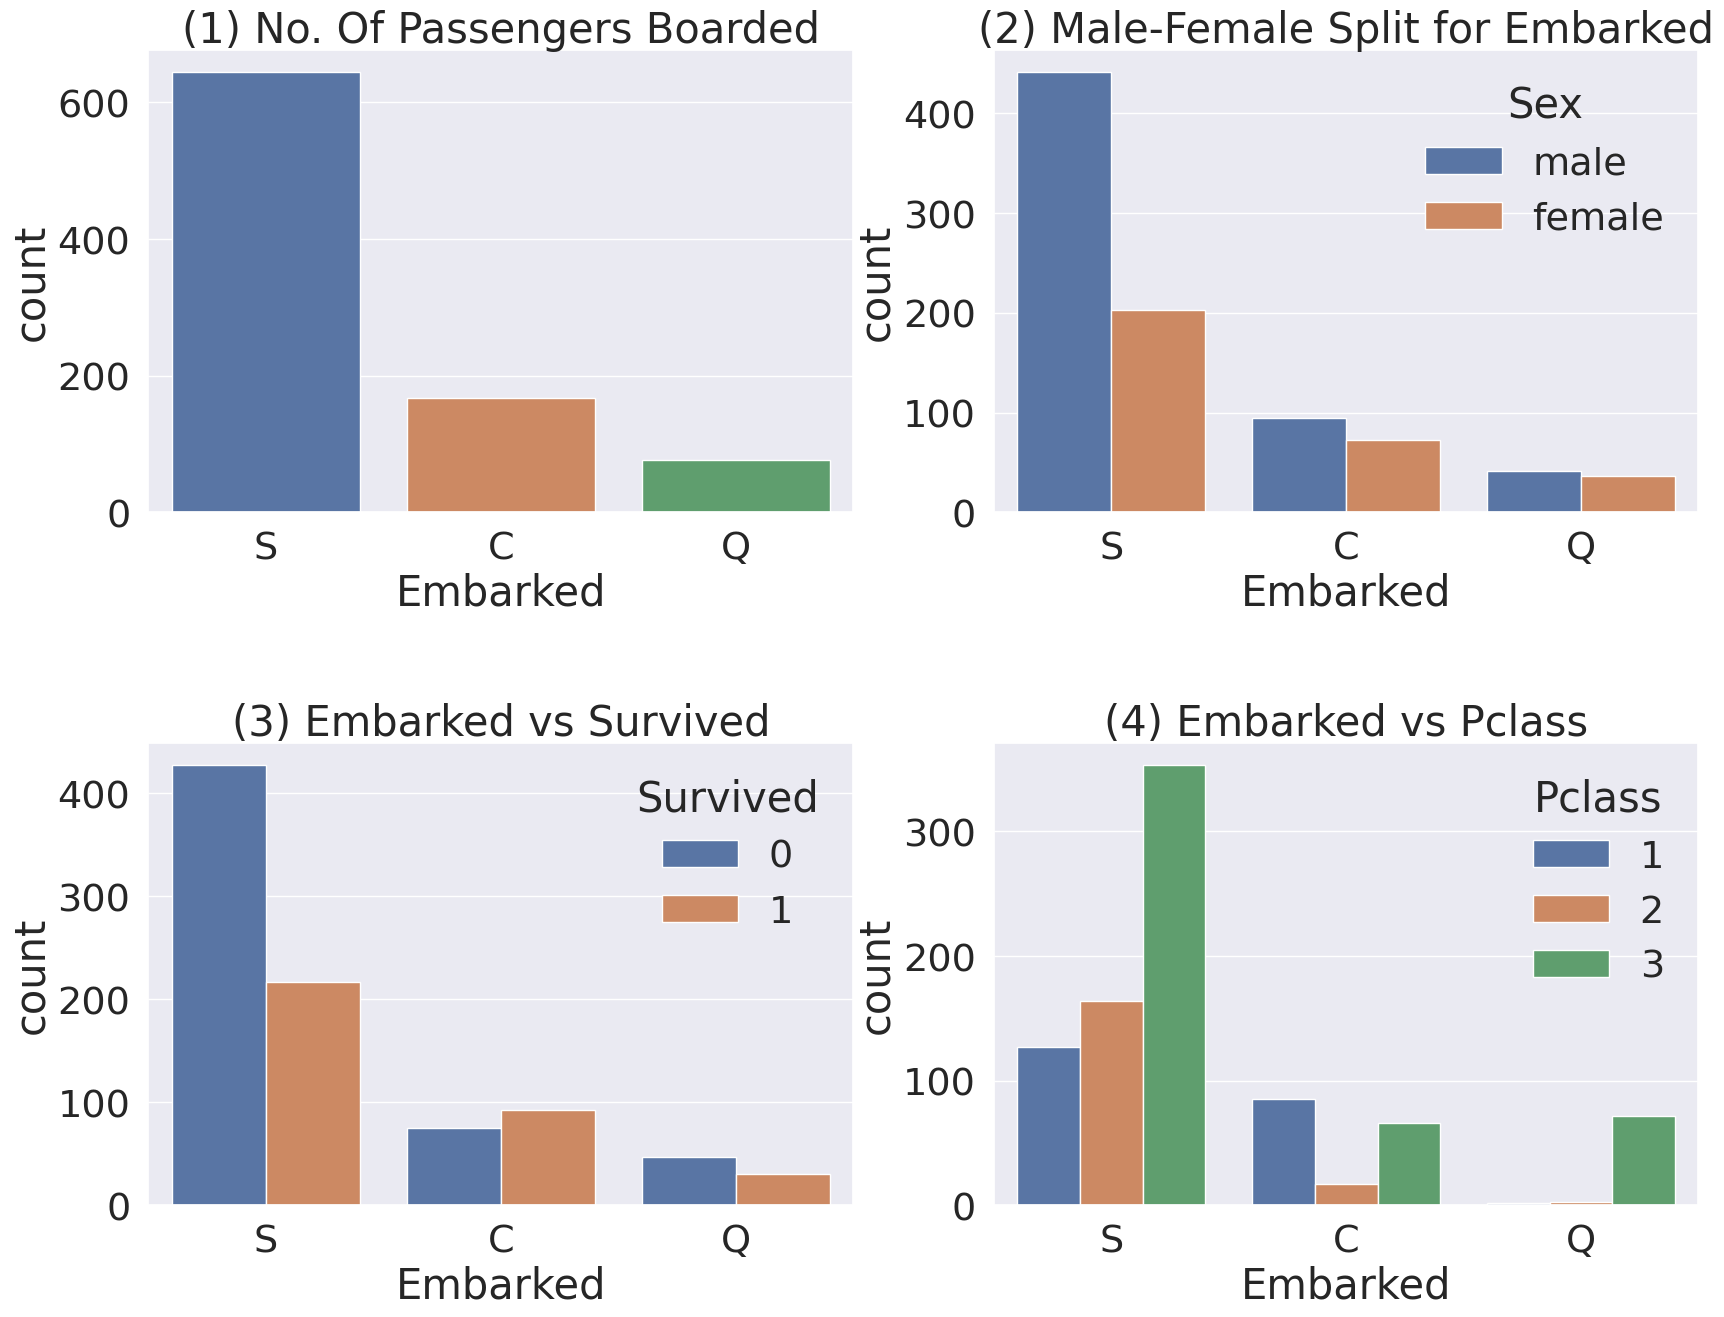

In [27]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

* Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.
* Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.
* Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있습니다. (이전 그래프에서 봤었습니다)
* Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class 가 많아서 생존확률이 낮게 나옵니다.

**2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)**
* SibSp와 Parch를 합하면 Family 가 될 것입니다. Family 로 합쳐서 분석해봅시다

In [28]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
#자신을 포함해야하므로 +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [29]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


* FamilySize 와 생존의 관계를 한번 살펴봅시다

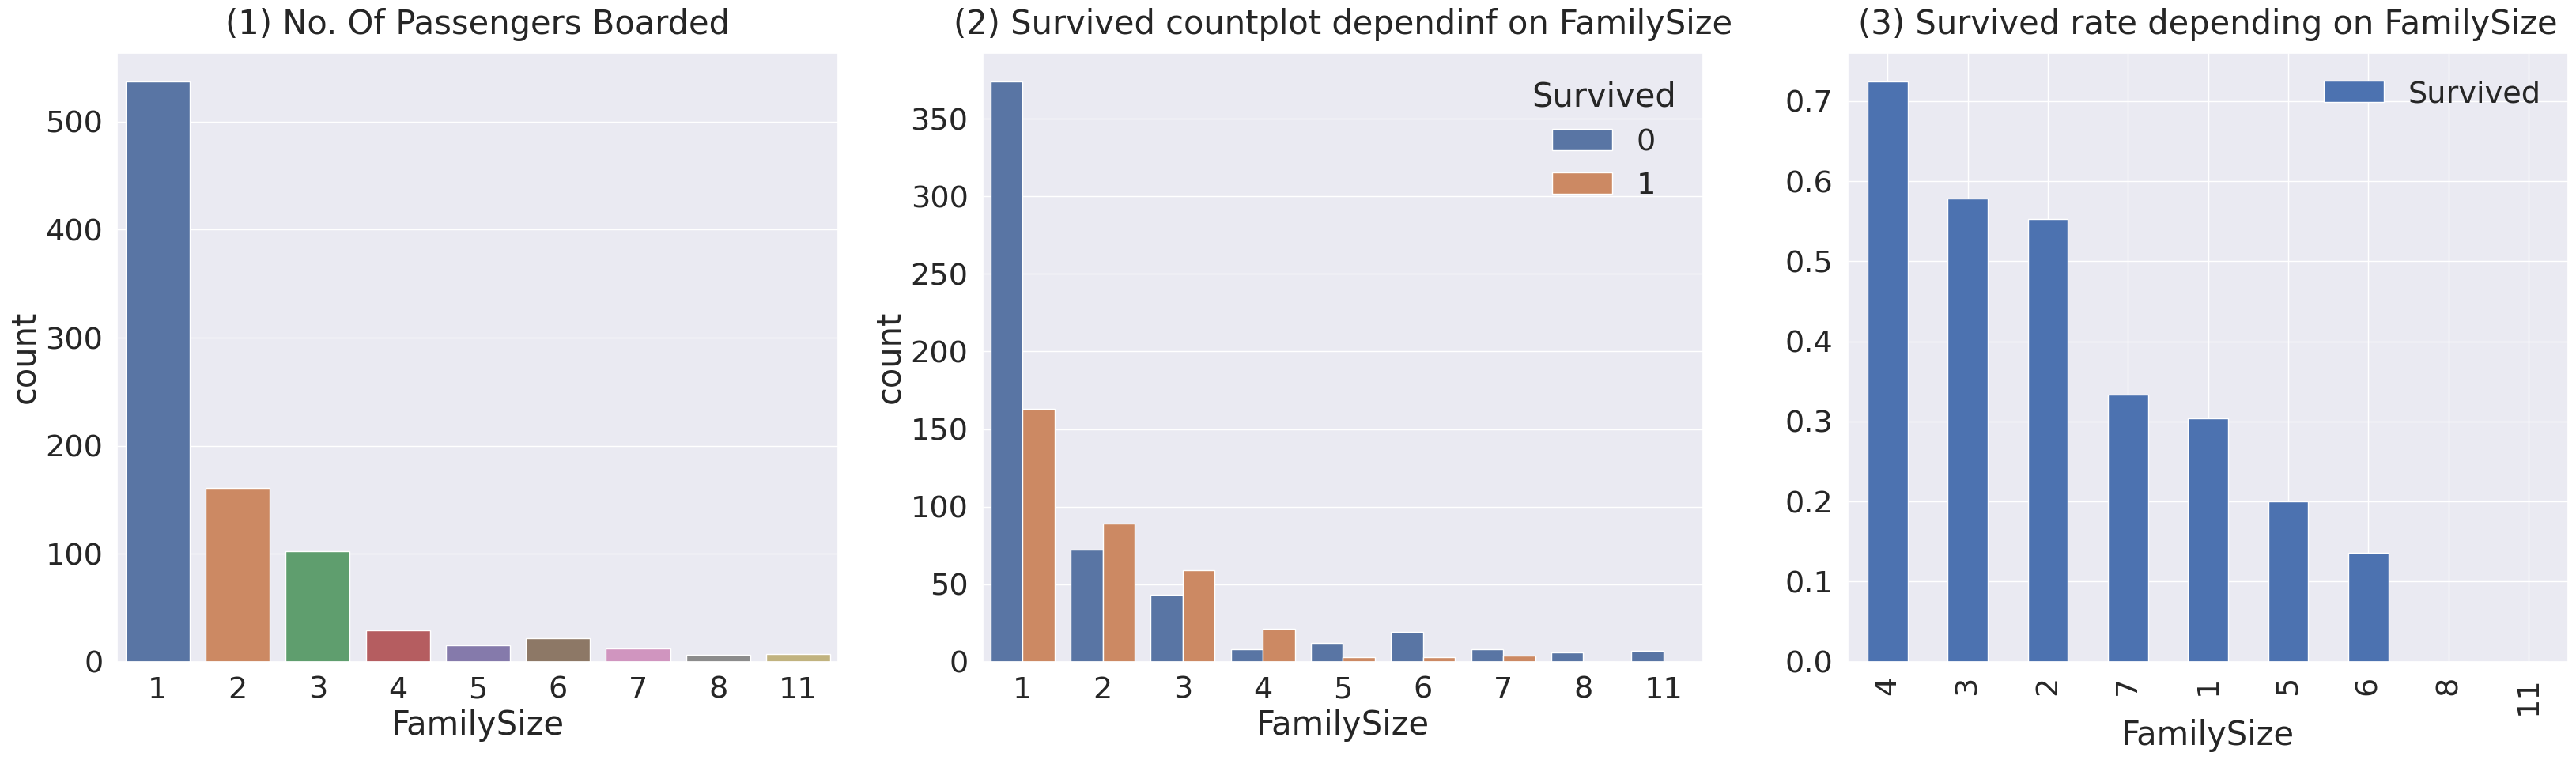

In [30]:
f, ax=plt.subplots(1, 3, figsize=(40,10))

sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot dependinf on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.
* Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아지네요. 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작네요. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.

**2.8 Fare**
* Fare 는 탑승요금이며, contious feature 입니다. 한번 histogram 을 그려보겠습니다.

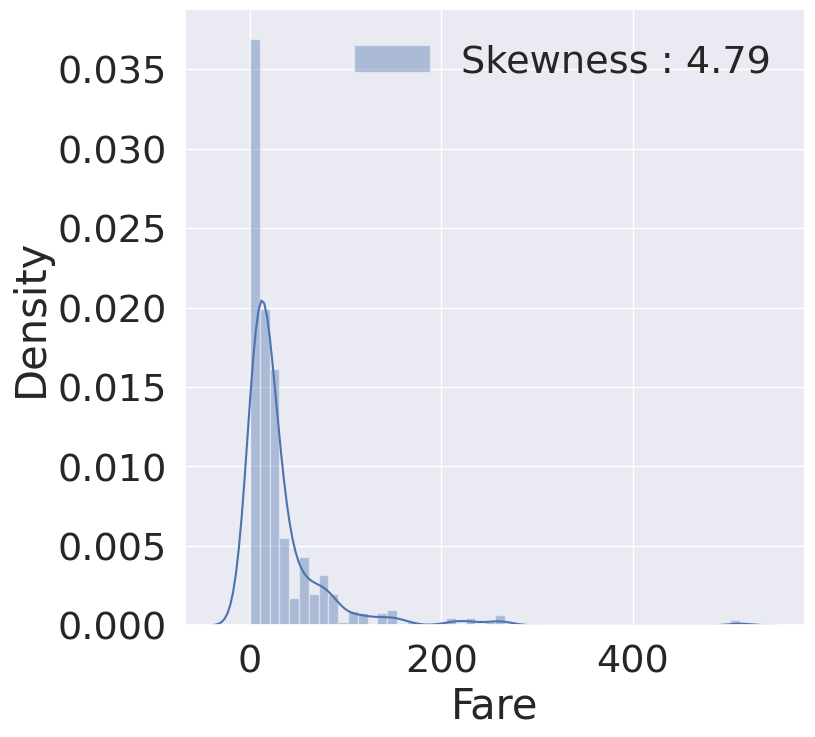

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

##skewness : 편포도 == 비대칭도 == 왜도

* 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.
* outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.
* 여기서 우리는 pandas 의 유용한 기능을 사용할 겁니다. dataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.
* 우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요!

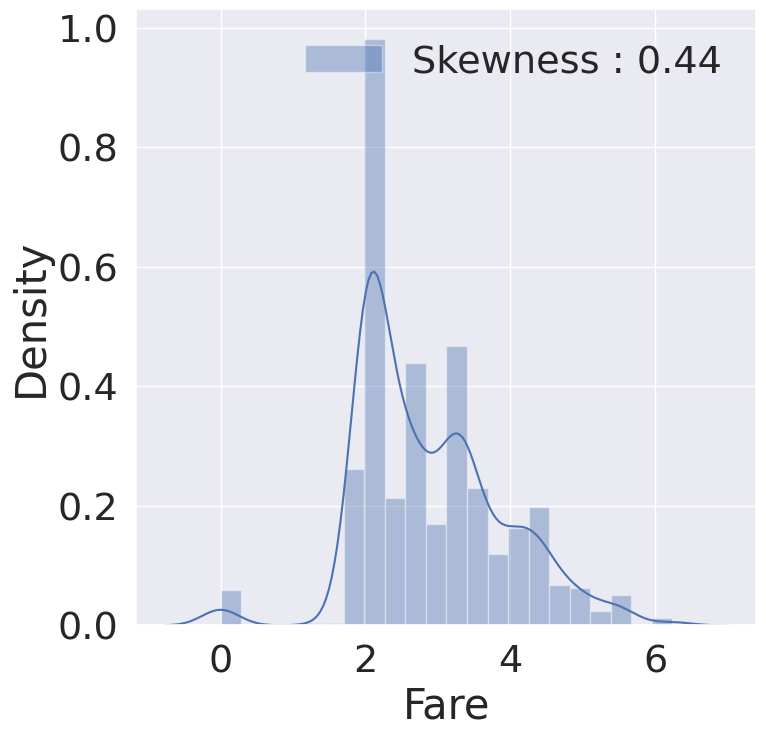

In [32]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
# testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i:np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i:np.log(i) if i>0 else 0)

fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g.legend(loc='best')

* log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.
* 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.
* 사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.
* 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고 하는데, 우리는 이제 그것을 살펴볼 것입니다.

**2.9 Cabin**
* 이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.
* 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

In [33]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


**2.10 Ticket**
* 이 feature 는 NaN 은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [34]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

* 보시다시피, ticket number 는 매우 다양합니다. 우리는 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까요?
* 여러분이 직접 한번 아이디어를 내보세요! 이것이 본격적인 캐글 레이스의 시작점입니다 ^^
* 이 튜토리얼에서는 튜토리얼이니 일단 ticket 은 넘기도록 하겠습니다. 튜토리얼을 끝낸 후, 여러분의 모델의 성능을 향상시키기 위해 ticket 에서 정보를 이끌어내는 것도 좋겠네요!

**Feature Engineering**

* train data와 test data 모두 적용.

In [35]:
#Age
df_train['Age'].isnull().sum()

177

* 여기서 null data를 다른 값으로 치환하고자함
* 그런데 영어에서는 이름에 미스터 미스 이런게 있기 때문에 그거를 기준으로 그룹화 해서 나이에 null 값을 대체하고자 함
* 미스터 미스 이런거 추출하기위해서 정규표현식 사용..??(먼말임) 근데 판다스에서는 쉽게 사용할 수 있대

In [36]:
df_train['Initial'] = df_train['Name'].str.extract('([a-zA-Z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([a-zA-Z]+)\.')

#띄어쓰기로 시작해 모든 알파벳이 포함된 문자열을 한 번이상 반복하다가 dot(.)으로 마무리하는 문자열이다.
#따라서 Mr,Miss 등 영어 호칭이 추출된다.

In [37]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


* 위 표에서 Master, Miss, Mr, Mrs는 많은데 나머지는 적다
* 그래서 나머지를 하나의 그룹으로 만들고자함
* replace 사용

In [38]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [39]:
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [40]:
df_train['Initial'].head(20)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
10      Miss
11      Miss
12        Mr
13        Mr
14      Miss
15       Mrs
16    Master
17        Mr
18       Mrs
19       Mrs
Name: Initial, dtype: object

In [41]:
df_train.groupby('Initial')['Age'].mean()
#lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

<Axes: xlabel='Initial'>

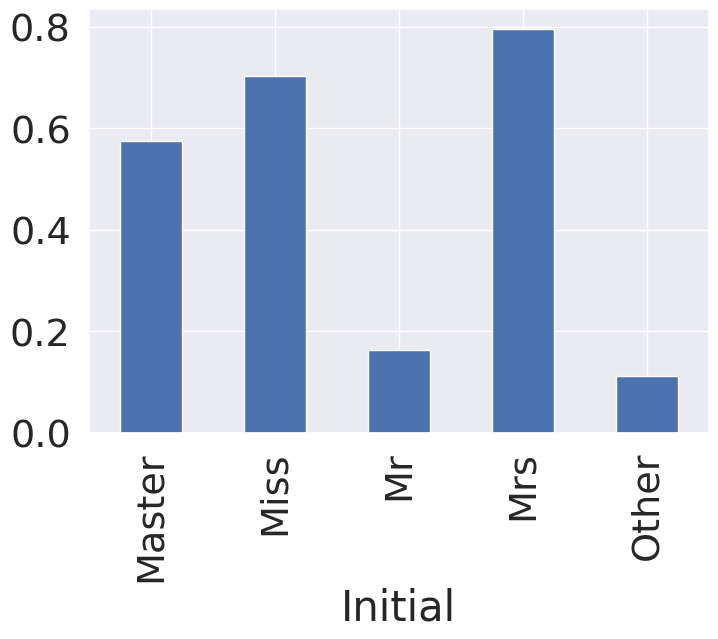

In [42]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

* test는 한번도 보지 않은 것
* test를 가지고 null data를 채우는 것은 모순
* 
* --> train에서 얻은 통계치를 가지고 train과 test의 null data를 모두 채운다

In [43]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mr'), 'Age'] = 33
#age가 null이고 Initial이 Mr인 행의 Age열에 앞서 구한 통계치 33을 대입
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mrs'), 'Age'] = 36
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Other'), 'Age'] = 46

df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mrs'), 'Age'] = 36
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Other'), 'Age'] = 46

In [44]:
df_train.loc[:, 'Age'].isnull().sum()

0

In [45]:
df_train['Embarked'].isnull().sum()

2

In [46]:
df_train.shape

(891, 14)

In [47]:
df_train['Embarked'].fillna('S', inplace=True)

In [48]:
df_train['Embarked'].isnull().sum()

0

* countinous한 data를 categorial data로 만드는 과정

In [49]:
df_train['Age_cat'] = 0

In [50]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [51]:
df_train.loc[df_train['Age']<10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

In [52]:
df_test.loc[df_test['Age']<10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] = 7

In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [54]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    

In [55]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [56]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

In [57]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [58]:
##
df_test.head(13)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,2.057860,NaN,Q,1,Mr,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,1.945910,NaN,S,2,Mrs,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,2.270836,NaN,Q,1,Mr,6.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,2.159003,NaN,S,1,Mr,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,2.508582,NaN,S,3,Mrs,2.0
5,897,3,"Svensson, Mr. Johan Cervin",male,0,0,7538,2.221917,NaN,S,1,Mr,1.0
6,898,3,"Connolly, Miss. Kate",female,0,0,330972,2.031983,NaN,Q,1,Miss,3.0
7,899,2,"Caldwell, Mr. Albert Francis",male,1,1,248738,3.367296,NaN,S,3,Mr,2.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,0,0,2657,1.978128,NaN,C,1,Mrs,1.0
9,901,3,"Davies, Mr. John Samuel",male,2,0,A/4 48871,3.184284,NaN,S,3,Mr,2.0


**영상 11**

* string data는 컴퓨터가 인식하지 못 할 수 있어서 numeric data로 바꾸고자함

In [59]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [60]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [61]:
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [62]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [63]:
df_train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [64]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [65]:
df_train.Embarked.isnull().sum()

0

In [66]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [67]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

* 여기까지해서 string data를 numeric data로 변환한 것임
* 이후에는 각 feature들 간의 선형적 상관관계(비례, 반비례)를 살펴볼 예정
* 피어슨 상관 계수 (Pearson Correlation Coefficient)을 활용 
* 1이면 양의 상관관계, -1이면 음의 상관관계, 0이면 선형적 상관관계 없음

In [68]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

<Axes: title={'center': 'Pearson Correalation of Features'}>

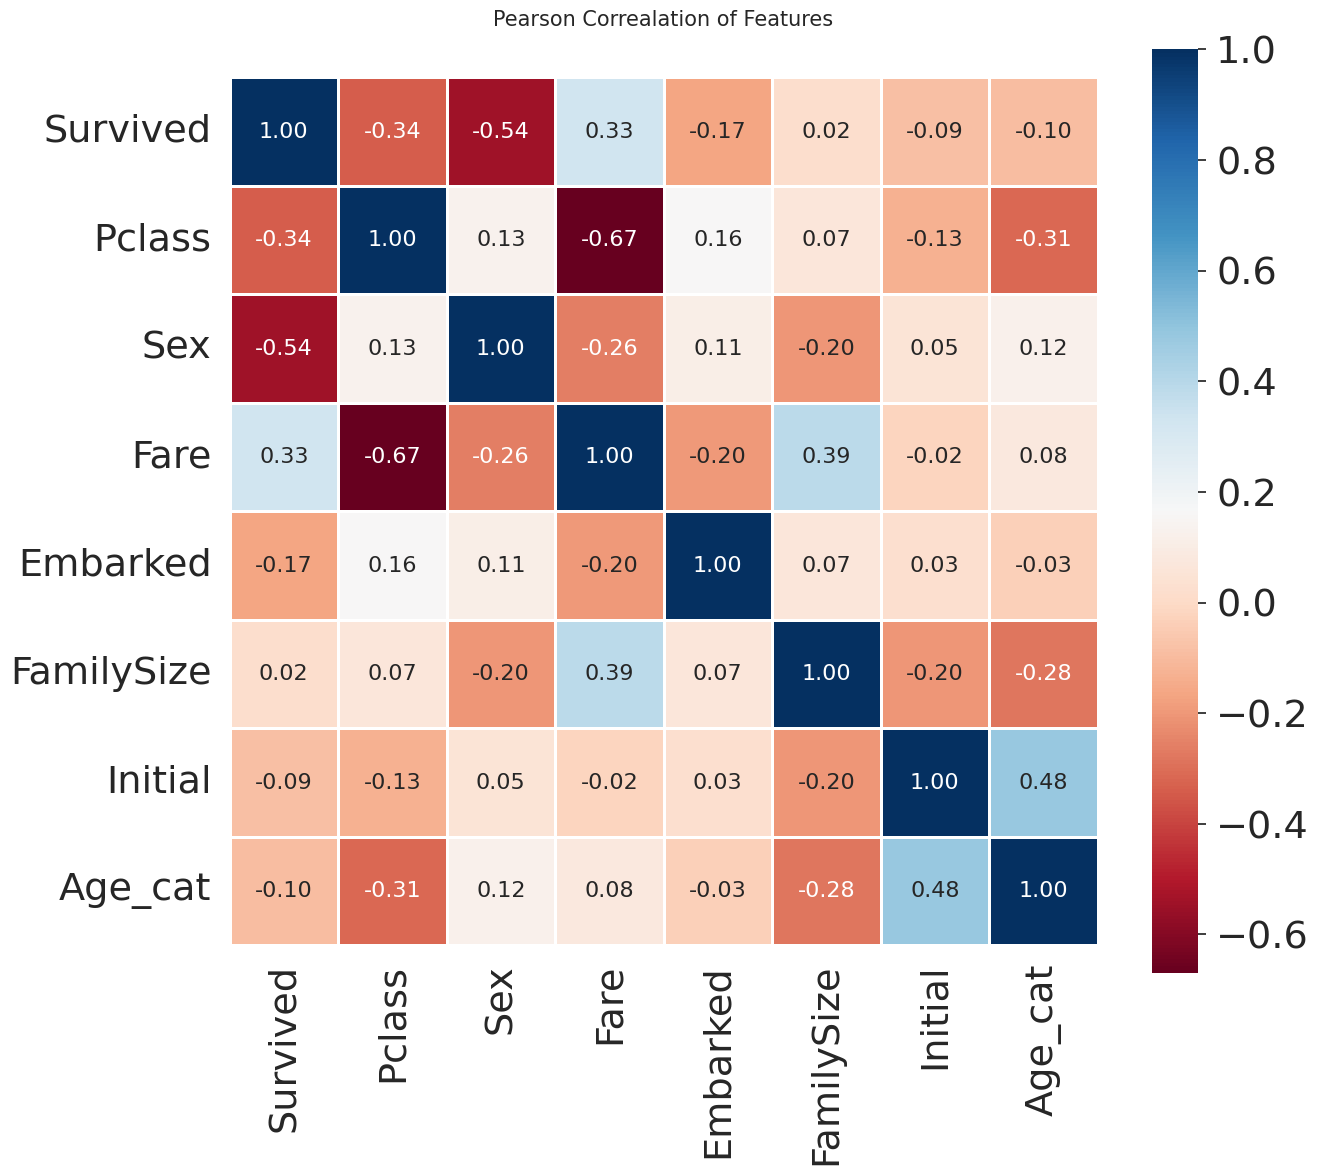

In [69]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=1,
            vmax=1.0, square=True, cmap=colormap,
            linecolor='white', annot=True, annot_kws={'size':16}, fmt='.2f')

* 자기 자신을 제외하고 1또는 -1이 없기 때문에 이 dataset에서는 불필요한 feature가 없다. (다 필요하다)
* ex) Fare와 Pclass가 서로 1이라면 둘 중 하나는 없어도 되는 feature

* 이후 one-hot encoding
* pandas의 get_dummies()를 이용하여 one-hot encoding을 할 수 있다

In [70]:
pd.get_dummies(df_train, columns = ['Initial'], prefix = ['Initial'])

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,2.564949,NaN,2,1,2,False,False,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,3.401197,B42,2,1,1,False,True,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,3.154870,NaN,2,4,2,False,True,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,3.401197,C148,0,1,2,False,False,True,False,False


In [71]:
df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix = ['Initial'])
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix = ['Initial'])

In [72]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = ['Embarked'])
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = ['Embarked'])

* 이후 안쓰는 컬럼들을 빼주는 과정

In [73]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,False,False,True,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,False,False,False,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,False,True,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,False,False,False,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,False,False,True,False,False,False,False,True


In [74]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [75]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,False,False,True,False,False,False,False,True
1,1,1,0,4.266662,2,3,False,False,False,True,False,True,False,False
2,1,3,0,2.070022,1,2,False,True,False,False,False,False,False,True
3,1,1,0,3.972177,2,3,False,False,False,True,False,False,False,True
4,0,3,1,2.085672,1,3,False,False,True,False,False,False,False,True


* 이후 머신러닝

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [77]:
X_train = df_train.drop(['Survived'], axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [78]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.3, random_state = 2024)

In [79]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [80]:
prediction = model.predict(X_vld)

In [81]:
prediction

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0])

In [82]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 80.60% 정확도로 생존 맞춤


In [83]:
model.feature_importances_

array([0.08495021, 0.10028334, 0.31653575, 0.1012904 , 0.12166487,
       0.00889863, 0.04873836, 0.14216598, 0.02731493, 0.00750877,
       0.01597246, 0.00867694, 0.01599937])

In [84]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

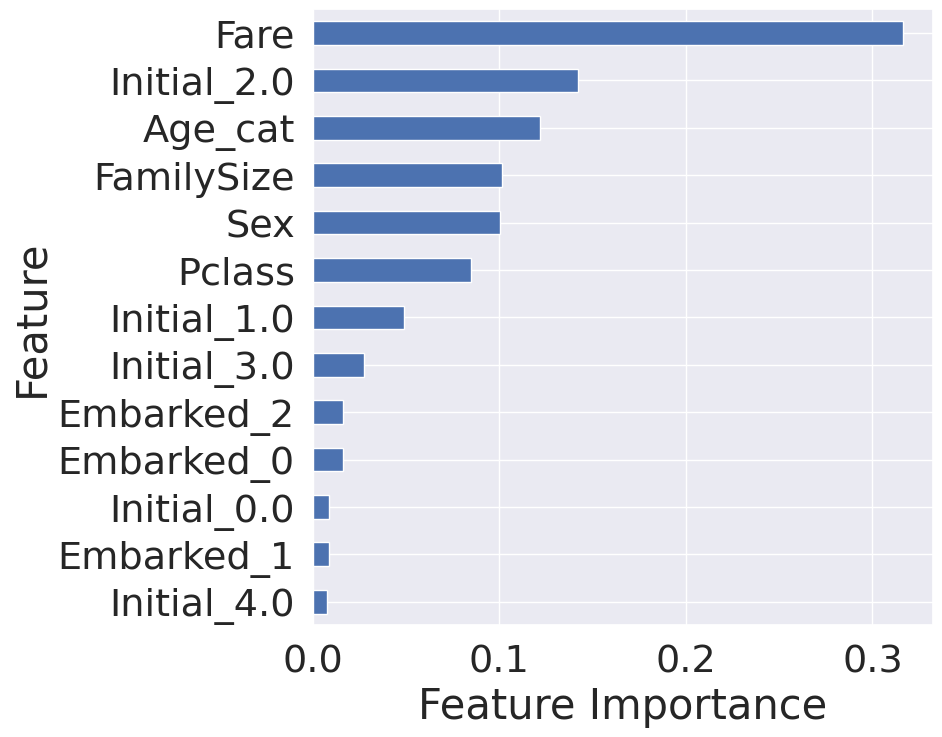

In [85]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

* 이후 실제 제출할것

In [86]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [87]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [88]:
#오류 발생해서 결측치 확인 (유튜브 댓글 복붙)
#ValueError: Input X contains NaN.

#for column in df_test.columns:
#    print('{} Column has {:d} Nan'.format(column, df_test.loc[:,column].isna().sum()))

In [89]:
prediction = model.predict(X_test)

In [90]:
submission['Survived'] = prediction

In [91]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [92]:
submission.to_csv('./my_first_submission.csv', index=False)